In [1]:
import regression
import numpy as np

In [2]:
xArr,yArr=regression.loadDataSet('ex0.txt')

In [3]:
xArr[0:2]

[[1.0, 0.067732], [1.0, 0.42781]]

In [4]:
ws = regression.standRegres(xArr,yArr)

In [5]:
xMat=np.mat(xArr)
yMat=np.mat(yArr)
yHat = xMat*ws

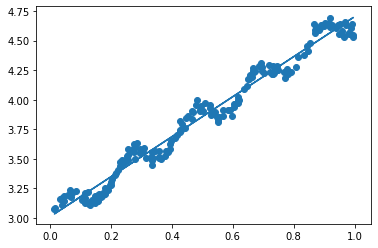

In [6]:
import matplotlib.pyplot as plt
plt.scatter(xMat[:,1].flatten().A[0], yMat.T[:,0].flatten().A[0])
#plt.scatter(xMat[:,1],yHat)  # 为什么同样的写法，plot可以，scatter不行？
plt.plot(xMat[:,1],yHat)  
plt.show()

In [7]:
np.corrcoef(yHat.T, yMat)

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

In [8]:
xArr,yArr=regression.loadDataSet('ex0.txt')

In [9]:
yArr[0]

3.176513

In [10]:
regression.lwlr(xArr[0],xArr,yArr,1.0)

3.1220447140568695

In [11]:
regression.lwlr(xArr[0],xArr,yArr,0.001)

3.201757285524224

In [12]:
yHat = regression.lwlrTest(xArr, xArr, yArr,0.01)

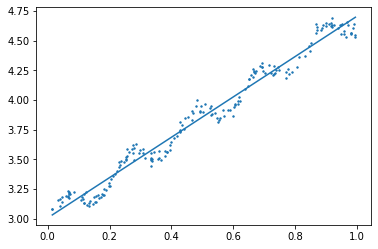

In [13]:
regression.plotLwlrTest(1.0)

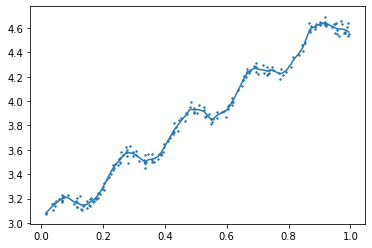

In [14]:
regression.plotLwlrTest(0.01)

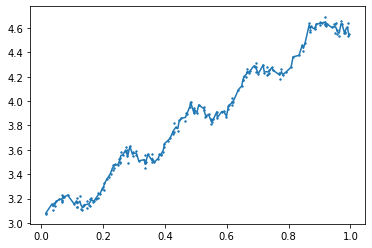

In [15]:
regression.plotLwlrTest(0.003)

In [16]:
abX,abY=regression.loadDataSet('abalone.txt')
yHat01=regression.lwlrTest(abX[0:99],abX[0:99],abY[0:99],0.1)
yHat1=regression.lwlrTest(abX[0:99],abX[0:99],abY[0:99],1)
yHat10=regression.lwlrTest(abX[0:99],abX[0:99],abY[0:99],10)

In [17]:
regression.rssError(abY[0:99],yHat01.T)

56.81549669032892

In [18]:
regression.rssError(abY[0:99],yHat1.T)

429.8905618702056

In [19]:
regression.rssError(abY[0:99],yHat10.T)

549.1181708826584

In [20]:
yHat01=regression.lwlrTest(abX[100:199],abX[0:99],abY[0:99],0.1)
regression.rssError(abY[100:199],yHat01.T)

40659.27596541478

In [21]:
yHat1=regression.lwlrTest(abX[100:199],abX[0:99],abY[0:99],1)
regression.rssError(abY[100:199],yHat1.T)

573.5261441898057

In [22]:
yHat10=regression.lwlrTest(abX[100:199],abX[0:99],abY[0:99],10)
regression.rssError(abY[100:199],yHat10.T)

517.5711905382693

In [23]:
ws = regression.standRegres(abX[0:99],abY[0:99])
yHat=np.mat(abX[100:199])*ws
regression.rssError(abY[100:199],yHat.T.A)

518.6363153248217

(30, 8)


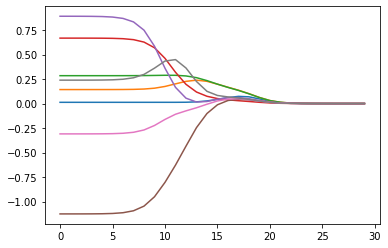

In [24]:
abX,abY=regression.loadDataSet('abalone.txt')
ridgeWeights=regression.ridgeTest(abX,abY)
import matplotlib.pyplot as plt
print (ridgeWeights.shape)
plt.plot(ridgeWeights)
plt.show()

In [33]:
def stageWise(xArr,yArr,eps=0.01,numIt=100):
    # Regularize the data to have 0 mean and unit variance
    X = regression.autoNorm(np.array(xArr))
    y = regression.autoNorm(np.array(yArr)) 
    ws = np.zeros(X.shape[1])
    for iter in range(numIt): # For every iteration:
        #print(ws)
        lowestError = np.inf #Set lowestError to +inf
        for feature in range(X.shape[1]): # For every feature:
            for sign in [1, -1]: # For increasing and decreasing:
                ws_local = ws.copy()
                ws_local[feature] += eps * sign # Change one coefficient to get a new W
                err = regression.rssError(y, X.dot(ws_local.T)) # Calculate the Error with new W
                if err < lowestError: # If the Error is lower than lowestError:
                    lowestError = err
                    ws_local_best = ws_local.copy() # set Wbest to the current W
        ws = ws_local_best.copy() # Update set W to Wbest
    return ws

In [34]:
xArr,yArr=regression.loadDataSet('abalone.txt')
stageWise(xArr,yArr,0.01,200)

array([ 0.01,  0.47,  0.05,  0.21,  0.  , -0.68,  0.  ,  0.58])

In [49]:
def regularize(xMat):#regularize by columns
    inMat = xMat.copy()
    inMeans = np.mean(inMat,0)   #calc mean then subtract it off
    inVar = np.var(inMat,0)      #calc variance of Xi then divide by it
    inMat = (inMat - inMeans)/inVar
    return inMat

def stageWise2(xArr,yArr,eps=0.01,numIt=100):
    xMat = np.mat(xArr); yMat=np.mat(yArr).T
    yMean = np.mean(yMat,0)
    yMat = yMat - yMean
    xMat = regularize(xMat)
    m,n=np.shape(xMat)
    returnMat = np.zeros((numIt,n)) #testing code remove
    ws = np.zeros((n,1)); wsTest = ws.copy(); wsMax = ws.copy()
    for i in range(numIt):
        #print ws.T
        lowestError = np.inf;
        for j in range(n):
            for sign in [-1,1]:
                wsTest = ws.copy()
                wsTest[j] += eps*sign
                yTest = xMat*wsTest
                rssE = regression.rssError(yMat.A,yTest.A)
                if rssE < lowestError:
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i,:]=ws.T
    return returnMat 

In [50]:
stageWise2(xArr,yArr,0.01,200)

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.04,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36]])